- 回忆回归问题的判定
    - 目标值是连续性的值，而分类问题的目标值是离散型的值。
- 回归处理的问题为预测：
    - 预测房价
    - 销售额的预测
    - 设定贷款额度
    - 总结：上述案例中，可以根据事物的相关特征预测出对应的结果值
- 线性回归在生活中的映射（现实生活中就有线性回归）：生活案例【预测学生的期末成绩】：
    - 期末成绩的制定：0.7*考试成绩+0.3平时成绩，则该例子中，特征值为考试成绩和平时成绩，目标值为总成绩。从此案例中大概可以感受到
        - 回归算法预测出来的结果其实就是经过相关的算法计算出来的结果值！
        - 每一个特征需要有一个权重的占比，这个权重的占比明确后，则就可以得到最终的计算结果，也就是获取了最终预测的结果了。
            - 那么这个特征对应的权重如何获取或者如何制定呢？

In [15]:
#现在有一组售房的数据
import numpy as np
import pandas
from pandas import DataFrame
import matplotlib.pylab as plt
dic = {
    '面积':[55,76,80,100,120,150],#特征数据
    '售价':[110,152,160,200,240,300] #目标数据
}
df = DataFrame(data=dic)
df

,面积,售价
0,55,110
1,76,152
2,80,160
3,100,200
4,120,240
5,150,300


- 需要对售房数据的分布情况进行展示

Text(0.5, 1.0, '面积和价钱的分布图')

/Users/rinhasumi/Ana109/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/rinhasumi/Ana109/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 31215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/rinhasumi/Ana109/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/rinhasumi/Ana109/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/rinhasumi/Ana109/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38065 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/rinhasumi/Ana109/anacon

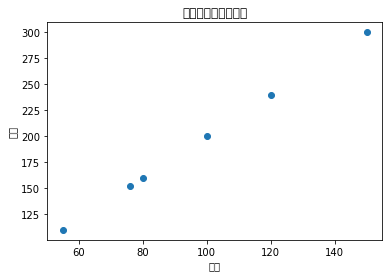

In [16]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

plt.scatter(df['面积'],df['售价'])
plt.xlabel('面积')
plt.ylabel('售价')
plt.title('面积和价钱的分布图')

- 问题：假如现在有一套房子，面积为76.8平米，那么这套房子应该卖多少钱呢？也就是如何预测该套房子的价钱呢？
    - 上图中散点的分布情况就是面积和价钱这两个值之间的关系，那么如果该关系可以用一个走势的直线来表示的话，那么是不是就可以通过这条走势的直线预测出新房子的价格呢？

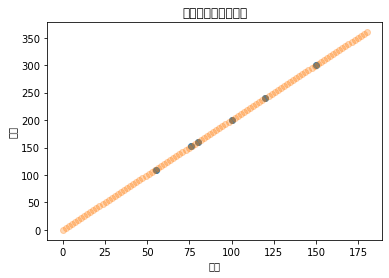

In [17]:
#忽略代码只看绘制出的图
plt.scatter(df['面积'],df['售价'])
plt.xlabel('面积')
plt.ylabel('售价')
plt.title('面积和价钱的分布图')
plt.scatter(np.linspace(0,180,num=100),np.linspace(0,180,num=100)*2,alpha=0.3)

- 散点的趋势：
    - 在上图中使用了一条直线来表示了房子的价格和面子对应的分布趋势，那么该趋势找到后，就可以基于该趋势根据新房子的面积预测出新房子的价格。
- 线性回归的作用：
    - 就是找出特征和目标之间存在的某种趋势！！！在二维平面中，该种趋势可以用一条线段来表示。
- 该趋势使用什么表示呢？---》线性方程：
    - 在数学中，线性方程y = wx就可以表示一条唯一的直线。那么在上述售房数据中，面积和价格之间的关系（二倍的关系）其实就可以映射成
        - 价格 = 2 * 面积 ==》y=2x，这个方程就是价格和面积的趋势！也就是说根据该方程就可以进行新房子价格的预测
    - 标准的线性方程式为：y = wx + b,w为斜率，b为截距。那么如果用线性方程表示房价和面积的趋势的话，这个b是否需要带上呢？

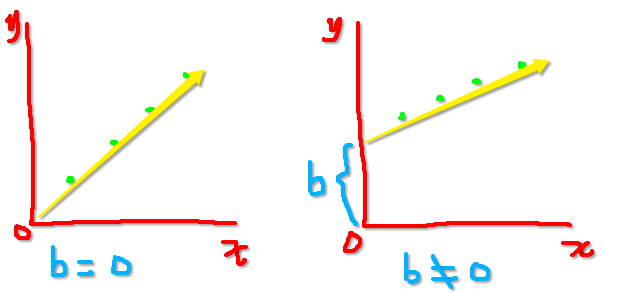

- 是否带上b，得具体情况具体分析。y=wx,如果x为0，则y必定为0，那就意味着趋势对应的直线必过坐标系的原点（0，0），如果带上b值，则直线不过原点。如果上有图的趋势直线过原点的话，趋势就会不准。加b的目的是为了使得趋势对应的直线更加具有通用性！！！
    - 如果目标值有可能为0的话，就带上b，否则不带b。

- 思考：【从一维拓展到多维】
    上述的线性方程y=wx+b其中x为特征y为目标，这种方程作为线性关系模型的预测依据的话是否可以满足所有的预测场景呢？
    - 如果现在房价受影响的因素不光是面积了，加入了采光率和楼层了，那么就意味着特征变成了3种。在原始的线性方程y=wx+b中只可以有一个特征，则该方程不具备通用性。
    - 标准线性关系模型为：
        - 售价 = （w1*面积+w2*采光率+w3*楼层）+ b==》y = (w1*x1+w2*x2+wn*xn)+b
            - w又叫做权重，x的每个维度对应一个权重wi。
            - b可以变换成w0*x0,x0=1
                - y = w0*x0+w1*x1+w2*x2+wn*xn
            - 权重向量（行向量）：w0,w1,...wn
                - 行向量的转置就是列向量。行向量是一个 1×n 的矩阵，即矩阵由一个含有n个元素的行所组成。
            - 行向量乘以行向量的转置为一个常数！！！

### 线性回归：
- 找出特征和特征权重之间的一种组合，从而来预测对应的结果！！！
    - 线性方程式：
    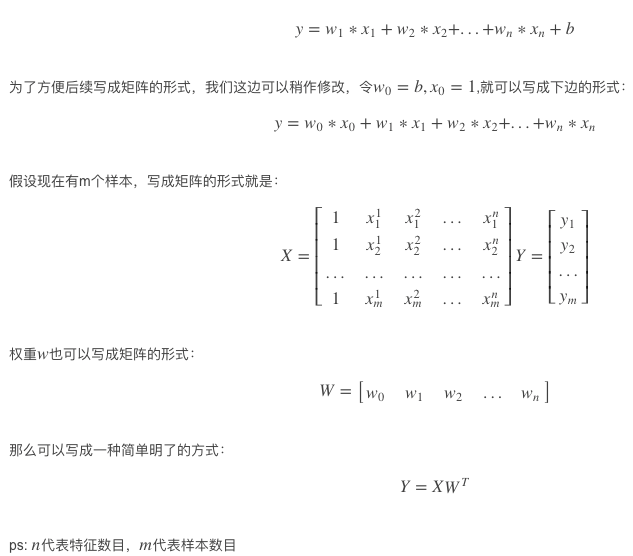
        

### 矩阵基础：是大多数算法的基础，非常重要
- 矩阵和数组的区别：
    - 数据可以是任意维度的
    - 矩阵必须是二维的
- 矩阵满足了一些特定的需求：
    - 矩阵乘法：（m行，b列）*（b行，n列）==（m行，n列）
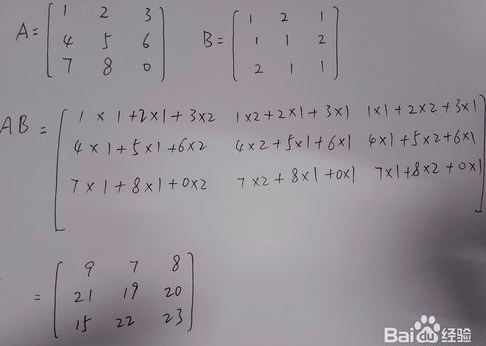

In [18]:
x = np.array([[1,2],[3,4],[5,6]])
y = np.array([[1,1,1],[2,2,2]])
display(x,y)
np.dot(x,y)

array([[1, 2],
       [3, 4],
       [5, 6]])

array([[1, 1, 1],
       [2, 2, 2]])

array([[ 5,  5,  5],
       [11, 11, 11],
       [17, 17, 17]])

In [19]:
ws = np.array([[2,2,2,2]]) #每个特征的权重
xs = np.array([[55,66,77,88],[35,46,97,118]])#两组特征
display(ws.T,xs)
np.dot(xs,ws.T)

array([[2],
       [2],
       [2],
       [2]])

array([[ 55,  66,  77,  88],
       [ 35,  46,  97, 118]])

array([[572],
       [592]])

- 上图房价预测中发现，该直线是穿过了所有的散点，那么如果已有的散点的分布没有这么规律的话，这条直线就无法穿过所有散点，怎么办呢？

    - 真实结果和预测结果是否会存在误差!

- 如果房价预测案例中，特征与目标之间的分布规律不是线性的，那是否还可以使用一条直线表示特征和目标之间的趋势呢？
        - 可以，只要保证直线距离所有的散点距离最近，则该直线还是可以在一定程度上表示非线性分布散点之间的分布规律。但是该规律会存在误差！
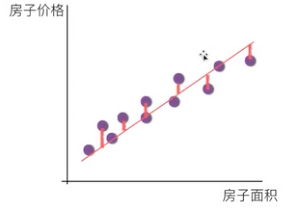
    

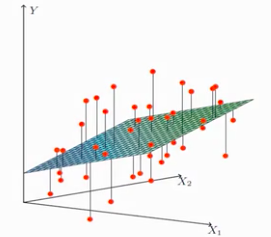
- 答：在多数的预测中都会和真实值存在一定的误差！

- 误差存在，那我们如何处理误差呢？在处理误差之前，我们必须先要知道一个回归算法的特性：
    - 【回归算法是一个迭代算法】。所谓的迭代就好比是系统版本的迭代，迭代后的系统要比迭代前的系统更好。
        - 当开始训练线性回归模型的时候，是逐步的将样本数据带入模型对其进行训练的。
        - 训练开始时先用部分的样本数据训练模型生成一组w和b，对应的直线和数据对应散点的误差比较大，通过不断的带入样本数据训练模型会逐步的迭代不好（误差较大）的w和b从而使得w和b的值更加的精准。
    - 官方解释：迭代是重复反馈过程的活动，其目的通常是为了逼近所需目标或结果。每一次对过程的重复称为一次“迭代”，而每一次迭代得到的结果会作为下一次迭代的初始值。

- 误差的处理方法：
    - 通俗点来说，回归算法就是在不断的自身迭代的减少误差来使得回归算法的预测结果可以越发的逼近真实结果！！！

- 如何不断迭代的减少误差呢？
    - 通过【损失函数】来表示误差
    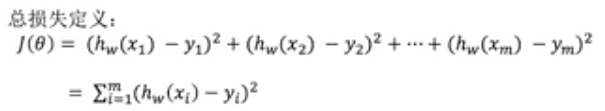
        - yi：为第i个训练样本的真实值
        - hw(xi):预测值
     - 误差的大小和我们线性回归方程中的哪个系数有直系的关联呢？
             

   - 损失函数也可以表示为:
    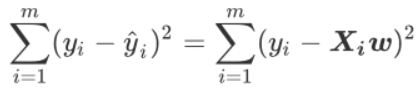

- 因此得知误差的大小线性回归方程中的系数w是有直系关联的
    - w（权重）的不同会导致误差大小的不同
    - 那么最终的问题就转化成了，【如何去求解方程中的w使得误差可以最小】

- L0，L1和L2范式：
    - L0是指向量中非0的元素的个数。
    - L1是指向量中各个元素绝对值之和。
    - L2是指向量各元素的平方和然后求平方根

- L2范式：
    - 这个损失函数代表了向量yi-y^i 的L2范式的平方结果，L2范式的本质是就是欧式距离，即是两个向量上的每个点对应相减后的平方和再开平方，我们现在只实现了向量上每个点对应相减后的平方和，并没有开方，所以我们的损失函数是L2范式，即欧式距离的平方结果。

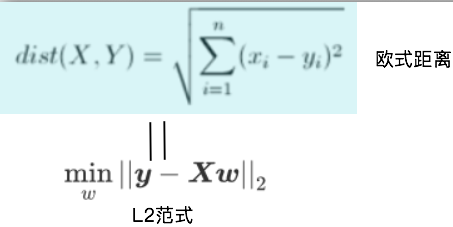

- 在这个平方结果下，我们的y和y^分别是我们的真实标签和预测值，也就是说，这个损失函数实在计算我们的真实标 签和预测值之间的距离。因此，我们认为这个损失函数衡量了我们构造的模型的预测结果和真实标签的差异，因此我 们固然希望我们的预测结果和真实值差异越小越好。所以我们的求解目标就可以转化为：
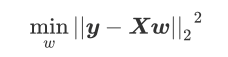

- SSE&RSS:    
    - 其中右下角的2表示向量y-Xw的L2范式，也就是我们的损失函数所代表的含义。在L2范式上开平方，就是我们的损失函数。我们往往称 呼这个式子为SSE(Sum of Sqaured Error，误差平方和)或者RSS(Residual Sum of Squares 残差平方和)。

- 最小二乘法
    - 现在问题转换成了求解让RSS最小化的参数向量w，这种通过最小化真实值和预测值之间的RSS来求解参数的方法叫做最小二乘法。
    - 求解极值（最小值）的第一步往往是求解一阶导数并让一阶导数等于0，最小二乘法也不能免俗。因此，我们现在在残差平方和RSS上对参数向量w求导。

- 首先w表示的是一个列向量（矩阵），我们现在并非是对常数求导，而是对列向量（矩阵）进行求导。矩阵求导的自行掌握即可。
- 首先将L2范式拆开：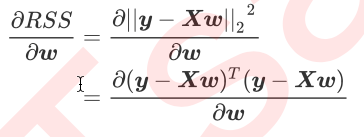
    - 两个向量（y&Xw）的平方就等于两个向量的转置乘以两个向量本身。

- 处理转置乘法和减法：
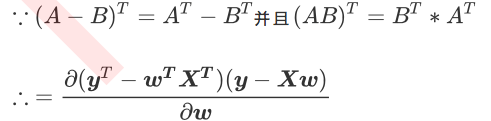

- 然后将上图的分子进行多项式相乘：
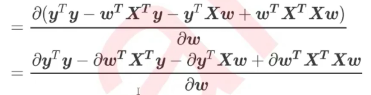

- 然后公式就变相为yTy对w求导，wTXTy对w的求导，yTXw对w的求导，wTXTXw对w的求导。这里的w为列向量(矩阵)则就涉及到对矩阵的求导：
    - 在矩阵求导中如果小a为常数项，A为矩阵则：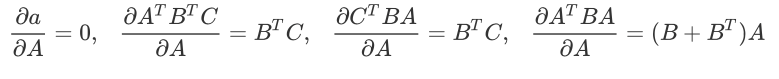
        - 由于y是一个列向量，为一阶矩阵，那么其本身乘以其转置为一个常数！

- 分子上的每一项对w进行求导后的结果为：
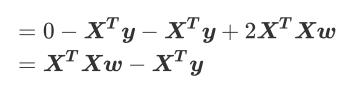
    - 至此我们就求解出了对w求导的一阶导数，接下来让一阶导数为0则就求出了最小误差下的w的值了。

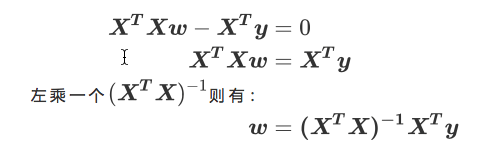
    - -1表示逆矩阵，矩阵*自己的逆矩阵=1

- API
    - 最小二乘（正规方程）：from sklearn.linear_model import LinearRegression

In [20]:
from sklearn.linear_model import LinearRegression
#LinearRegression()

- 最小二乘法
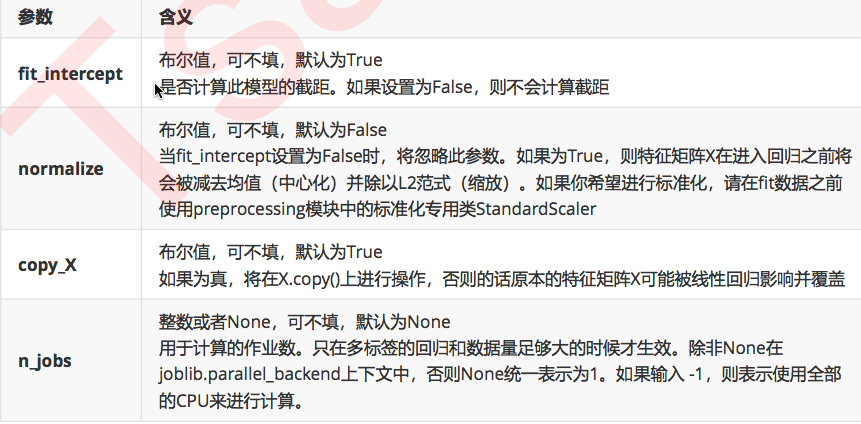
- 这些参数中并没有一个是必填的，更没有对我们的模型有不可替代作用的参数。这说明，线性回归的性能，往往取决于数据本身，而并非是我们的调参能力，线性回归也因此对数据有着很高的要求。幸运的是，现实中大部分连续型变量之间，都存在着或多或少的线性联系。所以线性回归虽然简单，却很强大。顺便一提，sklearn中的线性回归可以处理多标签问题，只需要在fit的时候输入多维度标签就可以了。

- normalize参数:如果为True，则会对特征数据进行归一化处理，如果想对特征数据进行标准化处理则需要在训练模型前调用相关工具类对其进行标准化处理。

- 使用最小二乘对加利福尼亚房屋进行预测
- 特征介绍：
    - AveBedrms:该街区平均的卧室数目 
    - Population:街区人口 
    - AveOccup:平均入住率 
    - Latitude:街区的纬度 
    - Longitude:街区的经度
    - MedInc:街区住户收入的中位数
    - HouseAge：房屋使用年数中位数
    - AveRooms：街区平均房屋的数量

In [21]:
from sklearn import datasets as dt
import pandas as pd
from sklearn.model_selection import train_test_split

In [22]:
data = dt.fetch_california_housing(data_home='./datasets')

In [23]:
feature = data.data
target = data.target

In [24]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2)

In [25]:
linner = LinearRegression()
linner.fit(x_train,y_train)
linner.score(x_test,y_test)

0.6226319524146289

In [26]:
#特征选择处理数据，查看是否可以提升模型的精度
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
p_feature = pca.fit_transform(feature)

In [28]:
x_train,x_test,y_train,y_test = train_test_split(p_feature,target,test_size=0.2)
linner = LinearRegression()
linner.fit(x_train,y_train)
linner.score(x_test,y_test) #评价指标并不只有score，按照score，回归场景下依然是判断预测值和实际值是否完全相等，下面介绍各种评价指标

0.5968828773473616

In [ ]:
#将系数和特征名称结合在一起查看
[*zip(feature_names,linner.coef_)]

### 回归模型的评价指标【MSE（越小越好）和R²（越接近1拟合越好）】
- 回归类算法的模型评估一直都是回归算法中的一个难点，回归类与分类型算法的模型评估其实是相似的法则— —找真实标签和预测值的差异。只不过在分类型算法中，这个差异只有一种角度来评判，那就是是否预测到了正确的分类，而在我们的回归类算法中，我们有两种不同的角度来看待回归的效果:
    - 第一，我们【是否预测到了正确或者接近正确的数值】（因为误差的存在）。
    - 第二，我们【是否拟合到了足够的信息】。（是否模型预测的结果线性和样本真实的结果的线性更加吻合）
        - 这两种角度，分别对应着不同的模型评估指标。


#### 是否预测到了正确的数值
- 回忆一下我们的RSS残差平方和，它的本质是我们的预测值与真实值之间的差异，也就是从一种角度来评估我们回归的效力，所以RSS既是我们的损失函数，也是我们回归类模型的模型评估指标之一。但是，RSS有着致命的缺点: 它是一个无界的和，可以无限地大或者无限的小。我们只知道，我们想要求解最小的RSS，从RSS的公式来看，它不能为负，所以 RSS越接近0越好，但我们没有一个概念，究竟多小才算好，多接近0才算好?为了应对这种状况，sklearn中使用RSS 的变体，均方误差MSE(mean squared error)来衡量我们的预测值和真实值的差异:
(每个样本所对应的平均误差)
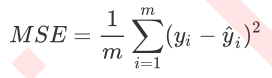
- 均方误差，本质是在RSS的基础上除以了样本总量，得到了每个样本量上的平均误差。有了平均误差，我们就可以将平均误差和我们的标签的取值范围（最大值和最小值）在一起比较，以此获得一个较为可靠的评估依据。（查看这个错误有多严重）。
    - 因为标签的最大值和最小值可以表示标签的一个分部情况，那么将其最大值和最小值和平均误差比较就可以大概看出在每个样本上的误差或者错误有多严重。


- 在sklearn当中，我们有两种方式调用这个评估指标：
    - 一种是使用sklearn专用的模型评估模块metrics里的类mean_squared_error
    - 另一种是调用 交叉验证的类cross_val_score并使用里面的scoring参数来设置为：neg_mean_squared_error使用均方误差。

In [30]:
from sklearn.metrics import mean_squared_error as MSE

In [34]:
# 将加利福尼亚房价的线性回归模型进行 MSE 评估

data = dt.fetch_california_housing(data_home='./datasets')
feature = data.data
target = data.target

x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2021)#r_s不写就会一直变

linner = LinearRegression()
linner.fit(x_train,y_train)
# linner.score(x_test,y_test)
#使用均方误差进行模型评估
y_true = y_test
y_pred = linner.predict(x_test)


MSE(y_true,y_pred) #0.51,在测试集中每个样本存在的误差是0.51（ MSE越小越精确，小到多少应该与真实值做个对比）

0.5198679461616793

In [36]:
#测试集中，房屋价格的区间分布
y_true.min(),y_true.max()
#于是，可以看出0.51的误差还是有点大了

(0.14999, 5.00001)

- 交叉验证求得的均方误差
    - 均方误差的计算公式中求得的均方误差的值不可能为负。但是sklearn中的参数scoring下，均方误差作为评判 标准时，却是计算”负均方误差“(neg_mean_squared_error)。这是因为sklearn在计算模型评估指标的时候，会考 虑指标本身的性质，均方误差本身是一种误差，所以被sklearn划分为模型的一种损失(loss)。在sklearn当中，所有 的损失都使用负数表示，因此均方误差也被显示为负数了。真正的均方误差MSE的数值，其实就是neg_mean_squared_error去掉负号的数字。

In [41]:
from sklearn.model_selection import cross_val_score
linner = LinearRegression()
cross_val_score(linner,x_test,y_test,cv=5,scoring='neg_mean_squared_error')#根据scoring，在用均方误差进行交叉验证

#这里用负号表示了“损失”，去掉符号则是误差实际值

array([-13.02690529,  -0.48061078,  -0.55962452,  -0.49468872,
        -0.51896026])

- 绝对值误差（了解）
    - 除了MSE，我们还有与MSE类似的MAE(Mean absolute error，绝对均值误差):
    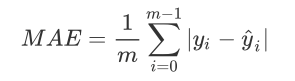
    - 其表达的概念与均方误差完全一致，不过在真实标签和预测值之间的差异外我们使用的是L1范式(绝对值)。现实使 用中，MSE和MAE选一个来使用就好了。
        - 在sklearn当中，我们使用命令
            - from sklearn.metrics import mean_absolute_error来调用MAE，
        - 同时，我们也可以使用交叉验证中的
            - scoring = "neg_mean_absolute_error"， 以此在交叉验证时调用MAE。

In [38]:
from sklearn.metrics import mean_absolute_error as MAE
data = dt.fetch_california_housing(data_home='./datasets')

feature = data.data
target = data.target

x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2021)

linner = LinearRegression()
linner.fit(x_train,y_train)
# linner.score(x_test,y_test)
#使用均方误差进行模型评估
y_true = y_test
y_pred = linner.predict(x_test)

#与上边MSE只有这里不同
MAE(y_true,y_pred)

0.5312663145537461

#### 是否拟合了足够的信息
- 对于回归类算法而言，只探索数据预测是否准确是不足够的。除了数据本身的数值大小之外，我们还希望我们的模型能够捕捉到数据的”规律“，比如数据的分布规律（抛物线），单调性等等。而是否捕获到这些信息是无法使用MSE来衡量的。
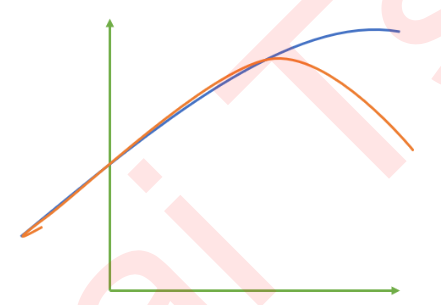

- 来看这张图，其中红色线是我们的真实标签，而蓝色线是我们模型预测的值。这是一种比较极端，但的确可能发生的情况。这张图像上，前半部分的拟合非常成功，看上去我们的真实标签和我们的预测结果几乎重合，但后半部分的拟合 却非常糟糕，模型向着与真实标签完全相反的方向去了。对于这样的一个拟合模型，如果我们使用MSE来对它进行判 断，它的MSE会很小，因为大部分样本其实都被完美拟合了，少数样本的真实值和预测值的巨大差异在被均分到每个 样本上之后，MSE就会很小。但这样的拟合结果必然不是一个好结果，因为一旦我的新样本是处于拟合曲线的后半段的，我的预测结果必然会有巨大的偏差，而这不是我们希望看到的。所以，我们希望找到新的指标，除了判断预测的 数值是否正确之外，还能够判断我们的模型是否拟合了足够多的，数值之外的信息。
- 在我们学习降维特征选择的时候，我们提到我们使用方差来衡量数据上的信息量。如果【方差越大，代表数据上的信息量越多】，而这个信息量（数据潜在的规律）不仅包括了数值的大小，还包括了我们希望模型捕捉的那些规律。为了衡量模型对数据上的信息量的捕捉，我们定义了R2来帮助我们:
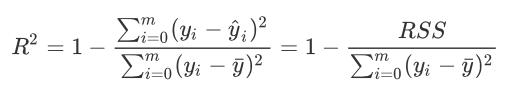

    RSS:模型没能捕获到的信息量；
    方差：分母上的方差越大，携带的信息越多，方差从而代表真实标签所携带的信息量；
    
    R²：1  -  “ 未能捕获的信息量占到真实携带信息量之比重 ”，R²越接近1，拟合效果越好；越偏离1，拟合效果越差

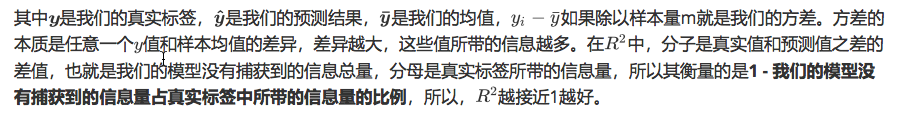

- 分母其实可以表示称为样本的潜在规律，分子为模型的误差（损失），那么样本数据潜在的规律是不变的，则误差越小则分子分母表达式返回的结果越小，则r2越接近1.

- 注意：

    R-Square的取值范围是“负无穷到1”，经常是“0到1”。（很多资料说是0~1是不准确的，有预测错误巨大导致y_predict巨大，从而分子巨大，R-Square远小于0的情况。）

- 可以使用三种方式来调用
    - 一种是直接从metrics中导入r2_score，输入预测值和真实值后打分。
    - 第二种是直接从 线性回归LinearRegression的接口score来进行调用。
    - 第三种是在交叉验证中，输入"r2"来调用。

In [43]:
from sklearn.metrics import r2_score #导入R²

data = dt.fetch_california_housing(data_home='./datasets')
feature = data.data
target = data.target
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2021)
linner = LinearRegression()
linner.fit(x_train,y_train)
# linner.score(x_test,y_test)
#使用均方误差进行模型评估
y_true = y_test
y_pred = linner.predict(x_test)

#用R2评分
r2_score(y_true,y_pred)

0.6196263393628889

In [44]:
linner = LinearRegression()
cross_val_score(linner,x_test,y_test,cv=5,scoring='r2')

array([-8.39672596,  0.61600585,  0.6102257 ,  0.64494468,  0.61964029])

### 实战
- 房地产估价数据集数据集（house.xlsx）
    - 数据集信息：
        - 房地产估值的市场历史数据集来自台湾新北市新店区。“房地产估价” 是一个回归问题。
    - 属性信息：

        - 输入如下：
            - X1 =交易日期（例如，2013.250 = 2013年3月，2013.500 = 2013年6月，等等）
            - X2 =房屋年龄（单位：年）
            - X3 =到最近的捷运站的距离（单位：米） ）
            - X4 =步行生活圈中的便利店的数量（整数）
            - X5 =地理坐标，纬度。（单位：度）
            - X6 =地理坐标，经度。（单位：度）

        - 输出结果如下：
            - Y =单位面积的房价（10000新台币/ Ping，其中Ping是本地单位，1 Ping = 3.3米平方）

实战结论：效果特别差，特征工程做了也很差。大致原因是过拟合和欠拟合。